In [1]:
import networkx as nx
from cdlib import algorithms, viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cdlib import NodeClustering
import datetime
from importlib import reload


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'karateclub', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


<h2> Membuat Graph dan komunitasnya

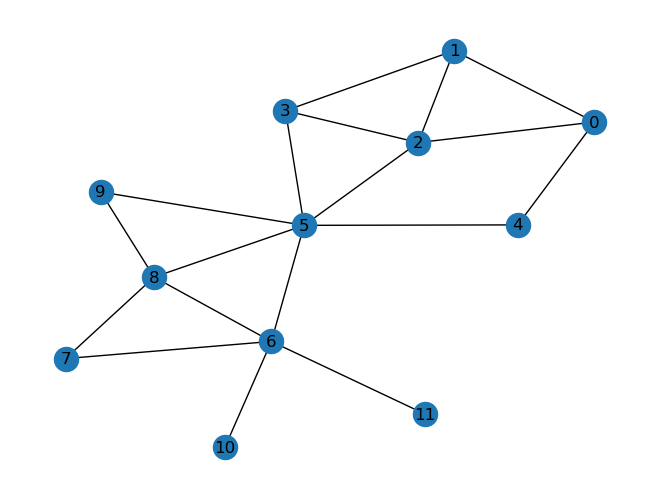

In [2]:
G = nx.Graph()

G.add_edges_from([ (0,1), (0,2), (1,2), (1,3), (2,3), (3,5),  (5,6), (5,9),(5,8), (6,7),  (7,8), 
                  (8,9) , (2,5), (6,8) , (0,4), (4,5), (6,10), (6,11)])

dataset="toy example"
#G = nx.read_gml(file, label = 'label')
    
#G=nx.convert_node_labels_to_integers(G,first_label=0)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos,with_labels=True,  font_color="black")



[[5, 6, 7, 8, 9, 10, 11], [0, 1, 2, 3, 4]]
modularity 0.3194444444444445


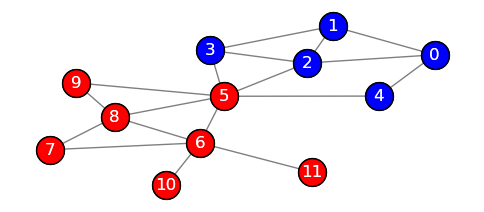

In [3]:
coms = algorithms.greedy_modularity(G)

 
print(coms.communities)
pos = nx.kamada_kawai_layout(G)
plt.rcParams.update({'font.size': 80})
viz.plot_network_clusters(G, coms, pos, plot_labels =True, node_size =400, figsize=(6,2.5) )
print("modularity",nx.community.modularity(G,coms.communities)) 


<h2>Degree Centrality

In [4]:
def comdegreecentrality(G, coms, alpha,r):
    result={}
    for com in coms.communities:
        H = G.subgraph(com)
        for node in H.nodes():
            result[node]= H.degree[node]+(alpha**r)*(G.degree[node]-H.degree[node])
            #print(node,H.degree[node]+alpha*(G.degree[node]-H.degree[node]))
    return(dict(sorted(result.items())))    


def comdegreecentralitynormalisasi(G, coms, alpha,r):
    result={}
    for com in coms.communities:
        H = G.subgraph(com)
        for node in H.nodes():
            pembilang= H.degree[node]+(alpha**r)*(G.degree[node]-H.degree[node])
            penyebut=H.number_of_nodes()+(alpha**r)*(G.number_of_nodes()-H.number_of_nodes())-1
            #print(node,pembilang,penyebut, pembilang/penyebut)
            result[node]=pembilang/penyebut
    return(dict(sorted(result.items())))            


In [5]:
#bikin iterasi disini
df = pd.DataFrame()
#print(np.arange(0,1,0.1))
for i in np.arange(0,1.1,0.1):
    cdcn=comdegreecentralitynormalisasi(G, coms,i,1)
    df[round(i,2)]=pd.DataFrame.from_dict(cdcn,orient='index')
x = datetime.datetime.now()
xx=x.strftime("%d %m %Y %H %M %S")
df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,0.750000,0.638298,0.555556,0.491803,0.441176,0.400000,0.365854,0.337079,0.312500,0.291262,0.272727
1,0.750000,0.638298,0.555556,0.491803,0.441176,0.400000,0.365854,0.337079,0.312500,0.291262,0.272727
2,0.750000,0.659574,0.592593,0.540984,0.500000,0.466667,0.439024,0.415730,0.395833,0.378641,0.363636
3,0.500000,0.446809,0.407407,0.377049,0.352941,0.333333,0.317073,0.303371,0.291667,0.281553,0.272727
4,0.250000,0.234043,0.222222,0.213115,0.205882,0.200000,0.195122,0.191011,0.187500,0.184466,0.181818
5,0.500000,0.507692,0.514286,0.520000,0.525000,0.529412,0.533333,0.536842,0.540000,0.542857,0.545455
6,0.833333,0.769231,0.714286,0.666667,0.625000,0.588235,0.555556,0.526316,0.500000,0.476190,0.454545
7,0.333333,0.307692,0.285714,0.266667,0.250000,0.235294,0.222222,0.210526,0.200000,0.190476,0.181818
8,0.666667,0.615385,0.571429,0.533333,0.500000,0.470588,0.444444,0.421053,0.400000,0.380952,0.363636
9,0.333333,0.307692,0.285714,0.266667,0.250000,0.235294,0.222222,0.210526,0.200000,0.190476,0.181818


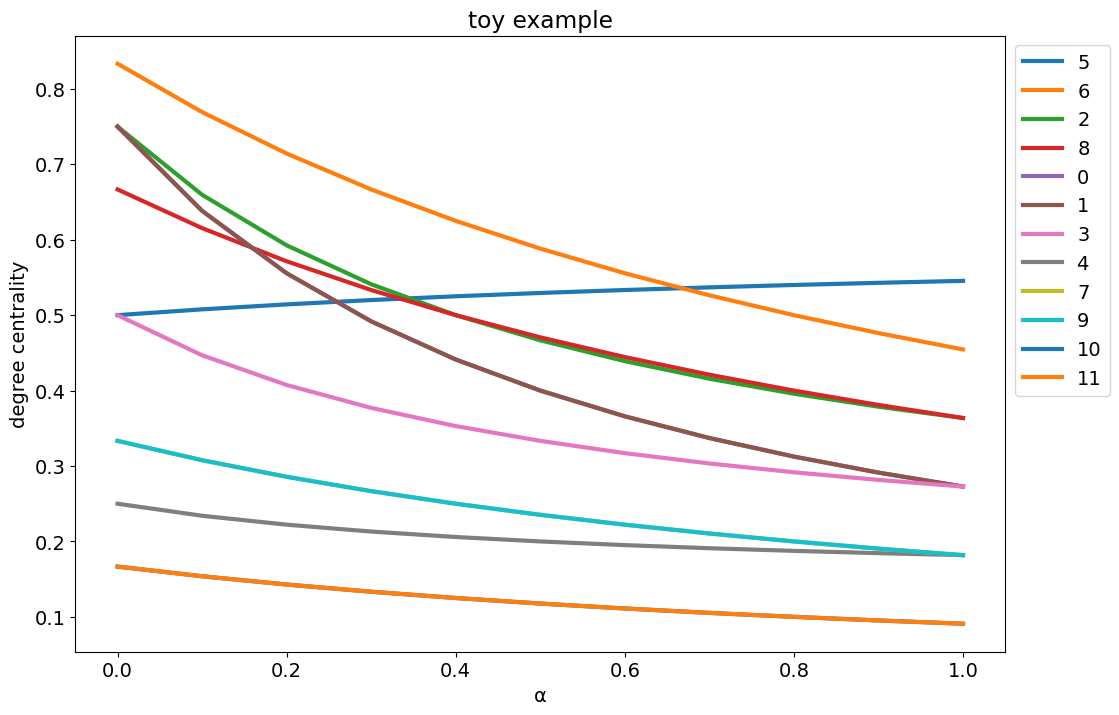

In [6]:
plt=reload(plt)
#df.drop('Unnamed: 0', inplace=True, axis=1)
df2=df.sort_values(by=1, ascending=False)
dft = df2.T
listindex=list(df2.index)
#listindex=listindex[0:15]
df2.head()
xpoints = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})

#for i in range(dft.shape[0]):
for i in listindex:   
    plt.plot(xpoints, dft[i], label = i,  linewidth=3)
#plt.plot(xpoints, dft[33], label = "curve 2")
plt.title(dataset)
plt.xlabel("α")
plt.ylabel("degree centrality")
plt.legend(bbox_to_anchor=(1, 1))
#plt.legend(loc="lower left", ncol=len(df.columns))

plt.savefig('DC '+dataset+'.png')
plt.show()


In [7]:
urutans=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dfurutan= pd.DataFrame()
for urutan in urutans:
    df3=df.sort_values(by=urutan, ascending=False)
    #print(df3.head())
    #print(list(df3.index))
    dfurutan[urutan]=list(df3.index)
dfurutan

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,6,6,6,6,6,6,6,5,5,5,5
1,0,2,2,2,5,5,5,6,6,6,6
2,1,0,8,8,8,8,8,8,8,8,2
3,2,1,0,5,2,2,2,2,2,2,8
4,8,8,1,0,0,0,0,0,0,0,0
5,3,5,5,1,1,1,1,1,1,1,1
6,5,3,3,3,3,3,3,3,3,3,3
7,7,7,7,7,7,7,7,7,7,7,4
8,9,9,9,9,9,9,9,9,9,9,7
9,4,4,4,4,4,4,4,4,4,4,9


<H2> Closeness Centrality

In [8]:
#community closeness centrality yang baru
def closenesscentrality(G, coms, alpha,r):
    #network closeness centrality dengan perhitungan
    dictClosenessComNet={}    
    dictShortestPathNet={}
    listnodes= list(G.nodes())
    for el1 in listnodes:
        sum_SPLengthNet=0
        for el2 in listnodes:        
            sum_SPLengthNet=sum_SPLengthNet+nx.shortest_path_length(G, source=el1, target=el2)
        dictShortestPathNet[el1] = sum_SPLengthNet
    #print(dict(sorted(dictShortestPathNet.items())))
    
    dictShortestPathSG={}
    for com in coms.communities:
        SG = G.subgraph(com)
        for el1 in com:
            sum_SPLengthSG=0
            for el2 in com:
                sum_SPLengthSG=sum_SPLengthSG+nx.shortest_path_length(SG, source=el1, target=el2)
            dictShortestPathSG[el1] = sum_SPLengthSG
            pembilang= len( SG.nodes() ) +(alpha**r)* ( len(G.nodes())-len( SG.nodes() ))   -1
            penyebut=(dictShortestPathSG[el1] + (alpha**r) *(dictShortestPathNet[el1]-dictShortestPathSG[el1]))
            dictClosenessComNet[el1]=pembilang/penyebut
            
    #print(dict(sorted(dictShortestPathSG.items())))
    return(dict(sorted(dictClosenessComNet.items())))
    #dictClosenessComNet={}
    
   

In [9]:
#ikin iterasi disini
df = pd.DataFrame()
#print(np.arange(0,1,0.1))
for i in np.arange(0,1.1,0.1):    
    cc=closenesscentrality(G, coms, i,1)
    df[round(i,2)]=pd.DataFrame.from_dict(cc,orient='index')
df
x = datetime.datetime.now()
xx=x.strftime("%d %m %Y %H %M %S")
 
df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,0.800000,0.643836,0.562500,0.512605,0.478873,0.454545,0.436170,0.421801,0.410256,0.400778,0.392857
1,0.800000,0.643836,0.562500,0.512605,0.478873,0.454545,0.436170,0.421801,0.410256,0.400778,0.392857
2,0.800000,0.712121,0.658537,0.622449,0.596491,0.576923,0.561644,0.549383,0.539326,0.530928,0.523810
3,0.571429,0.552941,0.540000,0.530435,0.523077,0.517241,0.512500,0.508571,0.505263,0.502439,0.500000
4,0.500000,0.494737,0.490909,0.488000,0.485714,0.483871,0.482353,0.481081,0.480000,0.479070,0.478261
5,0.666667,0.670103,0.673077,0.675676,0.677966,0.680000,0.681818,0.683453,0.684932,0.686275,0.687500
6,0.857143,0.792683,0.744681,0.707547,0.677966,0.653846,0.633803,0.616883,0.602410,0.589888,0.578947
7,0.600000,0.555556,0.522388,0.496689,0.476190,0.459459,0.445545,0.433790,0.423729,0.415020,0.407407
8,0.750000,0.706522,0.673077,0.646552,0.625000,0.607143,0.592105,0.579268,0.568182,0.558511,0.550000
9,0.500000,0.492424,0.486111,0.480769,0.476190,0.472222,0.468750,0.465686,0.462963,0.460526,0.458333


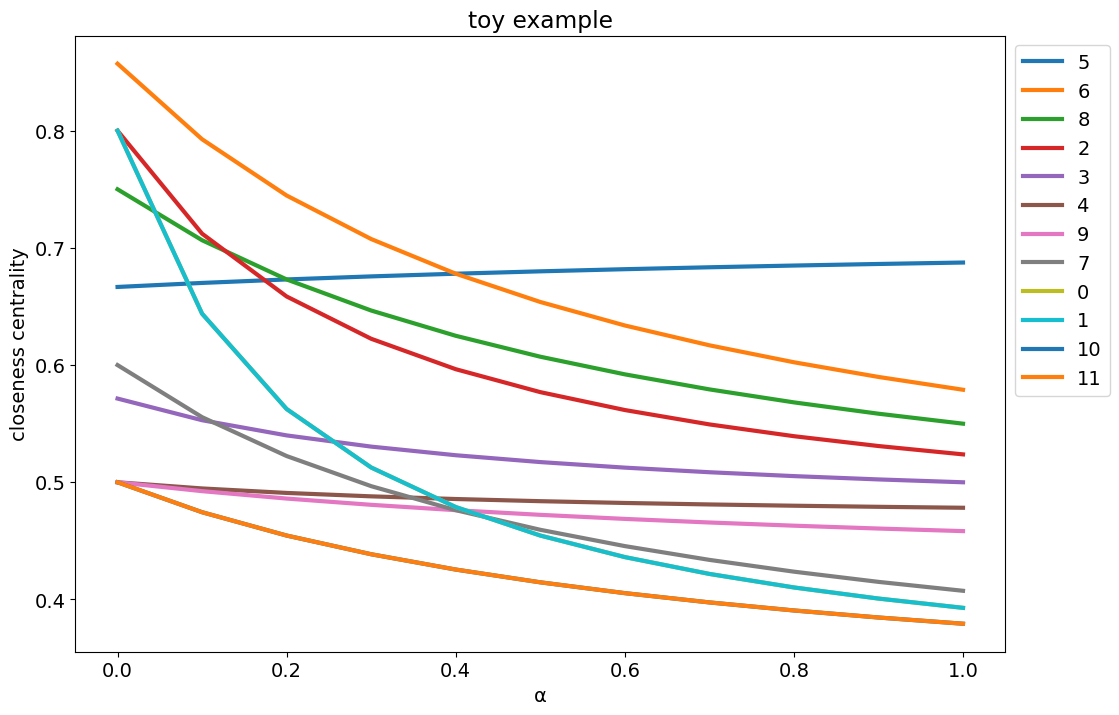

In [10]:
#df.drop('Unnamed: 0', inplace=True, axis=1)
df2=df.sort_values(by=1, ascending=False)
dft = df2.T
listindex=list(df2.index)
listindex=listindex[0:15]
df2.head()
xpoints = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})

#for i in range(dft.shape[0]):
for i in listindex:   
    plt.plot(xpoints, dft[i], label = i,  linewidth=3)
#plt.plot(xpoints, dft[33], label = "curve 2")
plt.xlabel("α")
plt.ylabel("closeness centrality")
plt.legend(bbox_to_anchor=(1, 1))
#plt.legend()
plt.title(dataset)
plt.savefig('CC '+dataset+'.png')

plt.show()


In [11]:
urutans=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dfurutan= pd.DataFrame()
for urutan in urutans:
    df3=df.sort_values(by=urutan, ascending=False)
    #print(df3.head())
    #print(list(df3.index))
    dfurutan[urutan]=list(df3.index)
dfurutan.head(10)    

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,6,6,6,6,5,5,5,5,5,5,5
1,0,2,5,5,6,6,6,6,6,6,6
2,1,8,8,8,8,8,8,8,8,8,8
3,2,5,2,2,2,2,2,2,2,2,2
4,8,0,0,3,3,3,3,3,3,3,3
5,5,1,1,0,4,4,4,4,4,4,4
6,7,7,3,1,0,9,9,9,9,9,9
7,3,3,7,7,1,7,7,7,7,7,7
8,4,4,4,4,7,0,0,0,0,0,0
9,9,9,9,9,9,1,1,1,1,1,1


<H2> Betweenness Centrality

In [12]:
df = pd.DataFrame()
dfs = pd.DataFrame()
dictBCSG={}
dictPC={}
for com in coms.communities:
    SG=G.subgraph(com)
    BCSG=nx.betweenness_centrality(SG, normalized=False)
    for el in com:
        dictPC[el]=(len(SG.nodes)-1)*(len(SG.nodes)-2)/2
    dictBCSG.update(BCSG)
dictBCSG=dict(sorted(dictBCSG.items())) 
dictBCG=nx.betweenness_centrality(G, normalized=False)    
df['BCSG']=pd.DataFrame.from_dict(dictBCSG,orient='index')
df['BCG']=pd.DataFrame.from_dict(dictBCG,orient='index')
df['selisih']=df['BCG']-df['BCSG']
df['pc']=pd.DataFrame.from_dict(dictPC,orient='index')
df['pg']=(len(G.nodes)-1)*(len(G.nodes)-2)/2
df['deltap']=df['pg']-df['pc']
r=1
for alpha in np.arange(0,1.1,0.1):
    dfs[round(alpha,2)]=(df['BCSG']+(alpha**r)*df["selisih"])/(df['pc']+(alpha**r)*df['deltap'])
x = datetime.datetime.now()
xx=x.strftime("%d %m %Y %H %M %S")
 
dfs

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,0.500000,0.261468,0.170886,0.123188,0.093750,0.073770,0.059322,0.048387,0.039823,0.032934,0.027273
1,0.166667,0.087156,0.056962,0.041063,0.031250,0.024590,0.019774,0.016129,0.013274,0.010978,0.009091
2,0.166667,0.151376,0.145570,0.142512,0.140625,0.139344,0.138418,0.137717,0.137168,0.136727,0.136364
3,0.000000,0.032110,0.044304,0.050725,0.054688,0.057377,0.059322,0.060794,0.061947,0.062874,0.063636
4,0.000000,0.032110,0.044304,0.050725,0.054688,0.057377,0.059322,0.060794,0.061947,0.062874,0.063636
5,0.100000,0.244737,0.339130,0.405556,0.454839,0.492857,0.523077,0.547674,0.568085,0.585294,0.600000
6,0.633333,0.565789,0.521739,0.490741,0.467742,0.450000,0.435897,0.424419,0.414894,0.406863,0.400000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.200000,0.171053,0.152174,0.138889,0.129032,0.121429,0.115385,0.110465,0.106383,0.102941,0.100000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


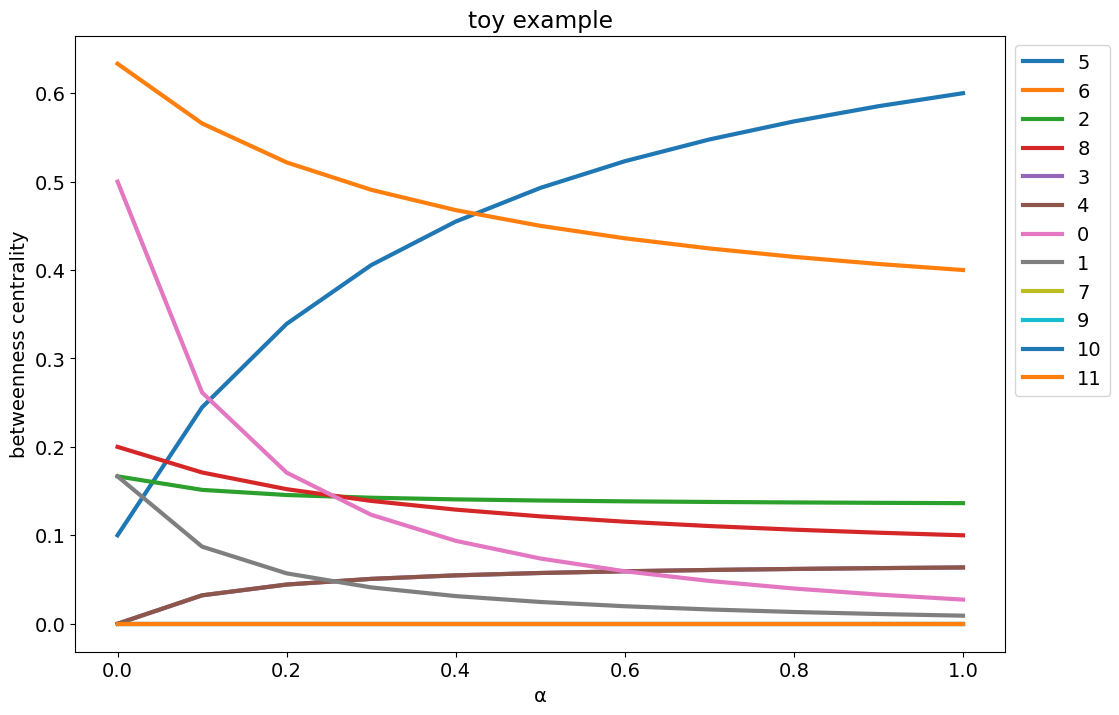

In [13]:
#df.drop('Unnamed: 0', inplace=True, axis=1)
df2=dfs.sort_values(by=1.0, ascending=False)
dft = df2.T
listindex=list(df2.index)
#listindex=listindex[0:15]
df2.head()
xpoints = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})

#for i in range(dft.shape[0]):
for i in listindex:   
    plt.plot(xpoints, dft[i], label = i,  linewidth=3)
#plt.plot(xpoints, dft[33], label = "curve 2")
plt.xlabel("α")
plt.ylabel("betweenness centrality")
plt.legend(bbox_to_anchor=(1, 1))
#plt.legend()
plt.title(dataset)
plt.savefig('BC '+dataset+'.png')
plt.show()


In [14]:
urutans=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dfurutan= pd.DataFrame()
for urutan in urutans:
    df3=dfs.sort_values(by=urutan, ascending=False)
    #print(df3.head())
    #print(list(df3.index))
    dfurutan[urutan]=list(df3.index)
dfurutan.head(10)    

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,6,6,6,6,6,5,5,5,5,5,5
1,0,0,5,5,5,6,6,6,6,6,6
2,8,5,0,2,2,2,2,2,2,2,2
3,1,8,8,8,8,8,8,8,8,8,8
4,2,2,2,0,0,0,3,3,3,3,3
5,5,1,1,3,3,3,4,4,4,4,4
6,3,3,3,4,4,4,0,0,0,0,0
7,4,4,4,1,1,1,1,1,1,1,1
8,7,7,7,7,7,7,7,7,7,7,7
9,9,9,9,9,9,9,9,9,9,9,9
